In [287]:
#Import all the required libraries
import os
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [288]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
torch.manual_seed(1)

In [289]:
#Define the model train function
def model_train(model, x, y):
    max_epoch = 20000
    epoch_array,loss_array=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_function(prediction, y)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        if epoch % 1000 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Maximum Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_array[-1])
                not_converged = False
                
    return epoch_array, loss_array, prediction

FUNCTION 1

X: torch.Size([300, 1])  Y: torch.Size([300, 1])


<ipython-input-290-1dd7ba4b2ace>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


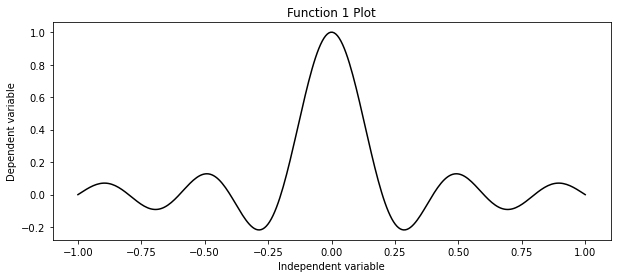

In [290]:
#Define the function to be used
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('X:',x.shape," Y:",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

#Plot the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "black")
plt.title('Function 1 Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

MODEL 1

In [291]:
#Define model 1
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x
 
model_1 = Model1()

optimizer = torch.optim.RMSprop(
    model_1.parameters(), 
    lr = 0.0012
)

loss_function = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, x, y)

571
epoch: 1000, loss = 0.0032
epoch: 2000, loss = 0.0030
Convergence reached for loss: 0.00095339556


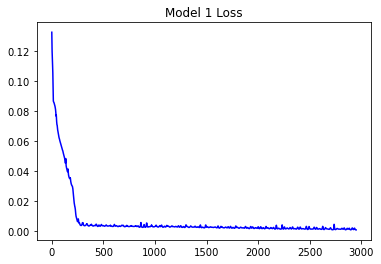

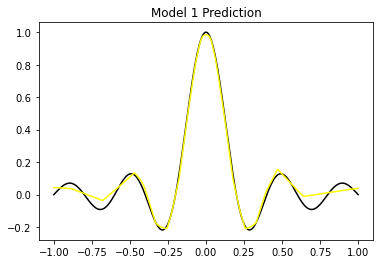

In [292]:
#Plot the loss and prediction for model 1
plt.plot(m1_epoch_arr, m1_loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m1_prediction.data.numpy(),color="yellow")
plt.title('Model 1 Prediction')
plt.show()

MODEL 2

In [293]:
#Define Model 2
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10) 
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 13)  
        self.linear4 = nn.Linear(13, 7)   
        self.predict = nn.Linear(7, 1) 
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model2()

optimizer = torch.optim.RMSprop(
    model_2.parameters(), 
    lr = 0.0012
)

loss_function = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x, y)

571
epoch: 1000, loss = 0.0030
epoch: 2000, loss = 0.0016
Convergence reached for loss: 0.0009651024


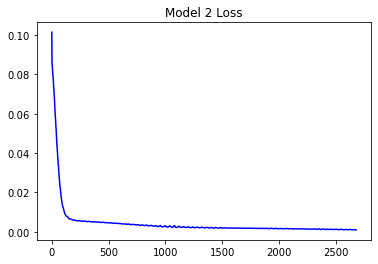

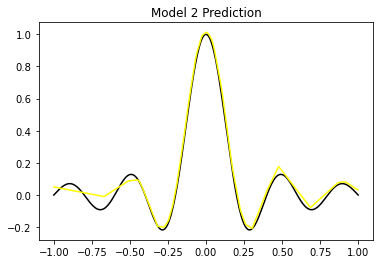

In [294]:
#Plot the loss and prediction for model 2
plt.plot(m2_epoch_arr, m2_loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m2_prediction.data.numpy(),color="yellow")
plt.title('Model 2 Prediction')
plt.show()

MODEL 3

In [295]:
#Define model 3
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

optimizer = torch.optim.RMSprop(
    model_3.parameters(), 
    lr = 0.0012
)

loss_function = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x, y)

571
epoch: 1000, loss = 0.0151
epoch: 2000, loss = 0.0088
epoch: 3000, loss = 0.0069
epoch: 4000, loss = 0.0060
epoch: 5000, loss = 0.0053
epoch: 6000, loss = 0.0048
epoch: 7000, loss = 0.0045
epoch: 8000, loss = 0.0040
epoch: 9000, loss = 0.0038
epoch: 10000, loss = 0.0035
epoch: 11000, loss = 0.0033
epoch: 12000, loss = 0.0030
epoch: 13000, loss = 0.0028
epoch: 14000, loss = 0.0027
epoch: 15000, loss = 0.0025
epoch: 16000, loss = 0.0024
epoch: 17000, loss = 0.0023
epoch: 18000, loss = 0.0022
epoch: 19000, loss = 0.0022
epoch: 20000, loss = 0.0021
Maximum Epoch Reached


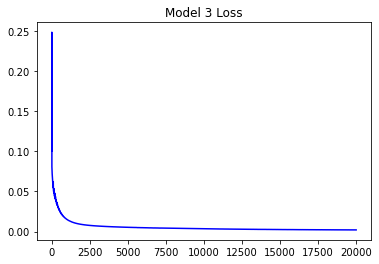

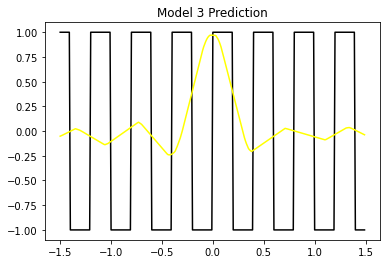

In [309]:
#Plot the loss and prediction for model 3
plt.plot(m3_epoch_arr, m3_loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m3_prediction.data.numpy(),color="yellow")
plt.title('Model 3 Prediction')
plt.show()

COMPARISON OF LOSS FOR DIFFERENT MODELS

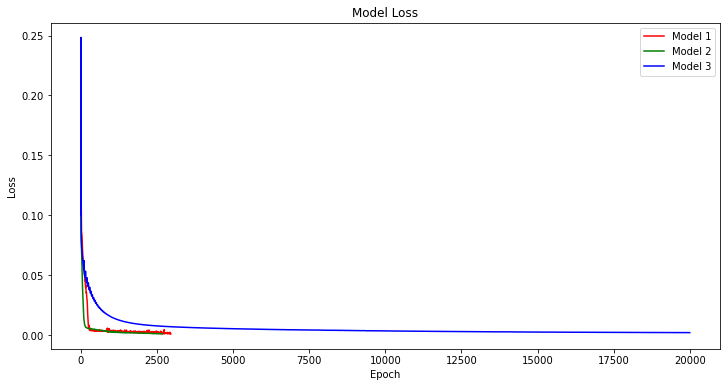

In [310]:
#Plot losses for all models together
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

COMPARISON OF PREDICTION FOR DIFFERENT MODELS

In [ ]:
#Plot predictions for all models together
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

FUNCTION 2

In [298]:
torch.manual_seed(1)

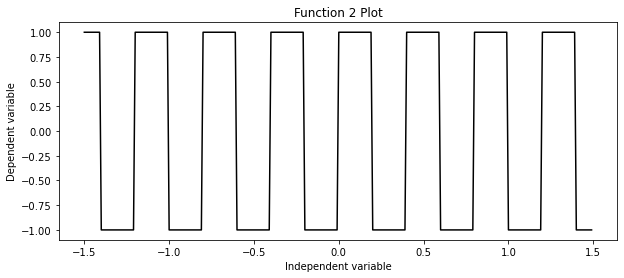

In [299]:
#Define the functiion
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y = np.sign(np.sin(5*np.pi*x))
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

#Plot the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "black")
plt.title('Function 2 Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

MODEL 1

In [300]:
#Define model 1 
model_sign_1 = Model1()
optimizer = torch.optim.Adam(
    model_sign_1.parameters(), 
    lr = 0.0012
)

loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1f2_epoch_arr, m1f2_loss_arr, m1f2_prediction = model_train(model_sign_1, x, y)

571
epoch: 1000, loss = 0.6142
epoch: 2000, loss = 0.3643
epoch: 3000, loss = 0.1350
epoch: 4000, loss = 0.0778
epoch: 5000, loss = 0.0616
epoch: 6000, loss = 0.0597
epoch: 7000, loss = 0.0509
epoch: 8000, loss = 0.0394
epoch: 9000, loss = 0.0346
epoch: 10000, loss = 0.0367
epoch: 11000, loss = 0.0627
epoch: 12000, loss = 0.0428
epoch: 13000, loss = 0.0306
epoch: 14000, loss = 0.0255
epoch: 15000, loss = 0.0247
epoch: 16000, loss = 0.0231
epoch: 17000, loss = 0.0308
epoch: 18000, loss = 0.0234
epoch: 19000, loss = 0.0255
epoch: 20000, loss = 0.0267
Maximum Epoch Reached


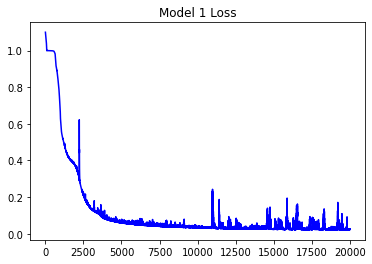

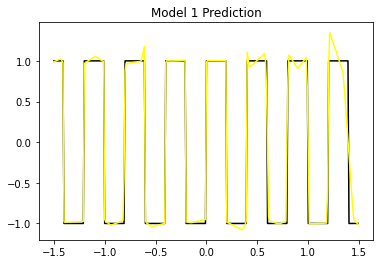

In [301]:
#Plot the loss and prediction for model 1
plt.plot(m1f2_epoch_arr, m1f2_loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m1f2_prediction.data.numpy(),color="yellow")
plt.title('Model 1 Prediction')
plt.show()

MODEL 2

In [302]:
#Define model 2 
model_sign_2 = Model2()
optimizer = torch.optim.Adam(
    model_sign_2.parameters(), 
    lr = 0.0012
)

loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2f2_epoch_arr, m2f2_loss_arr, m2f2_prediction = model_train(model_sign_2, x, y)

571
epoch: 1000, loss = 0.3218
epoch: 2000, loss = 0.2800
epoch: 3000, loss = 0.2625
epoch: 4000, loss = 0.2454
epoch: 5000, loss = 0.2343
epoch: 6000, loss = 0.2286
epoch: 7000, loss = 0.2238
epoch: 8000, loss = 0.1030
epoch: 9000, loss = 0.0860
epoch: 10000, loss = 0.0769
epoch: 11000, loss = 0.0782
epoch: 12000, loss = 0.0675
epoch: 13000, loss = 0.0648
epoch: 14000, loss = 0.0757
epoch: 15000, loss = 0.0620
epoch: 16000, loss = 0.0606
epoch: 17000, loss = 0.0591
epoch: 18000, loss = 0.0833
epoch: 19000, loss = 0.0587
epoch: 20000, loss = 0.0696
Maximum Epoch Reached


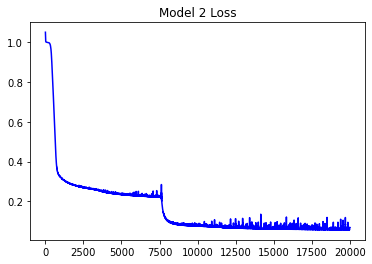

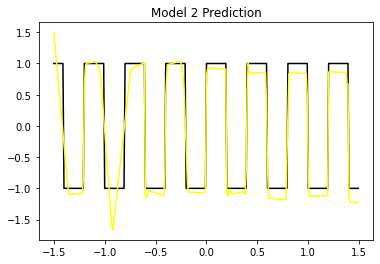

In [303]:
#Plot the loss and prediction for model 2
plt.plot(m2f2_epoch_arr, m2f2_loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m2f2_prediction.data.numpy(),color="yellow")
plt.title('Model 2 Prediction')
plt.show()

MODEL 3

In [304]:
#Define model 3
model_sign_3 = Model3()
optimizer = torch.optim.Adam(
    model_sign_3.parameters(), 
    lr = 0.0012
)

loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3f2_epoch_arr, m3f2_loss_arr, m3f2_prediction = model_train(model_sign_3, x, y)

571
epoch: 1000, loss = 0.6317
epoch: 2000, loss = 0.3614
epoch: 3000, loss = 0.2740
epoch: 4000, loss = 0.2408
epoch: 5000, loss = 0.2242
epoch: 6000, loss = 0.2149
epoch: 7000, loss = 0.2096
epoch: 8000, loss = 0.2030
epoch: 9000, loss = 0.1977
epoch: 10000, loss = 0.1935
epoch: 11000, loss = 0.1903
epoch: 12000, loss = 0.1880
epoch: 13000, loss = 0.1846
epoch: 14000, loss = 0.1818
epoch: 15000, loss = 0.1798
epoch: 16000, loss = 0.1779
epoch: 17000, loss = 0.1763
epoch: 18000, loss = 0.1749
epoch: 19000, loss = 0.1737
epoch: 20000, loss = 0.1724
Maximum Epoch Reached


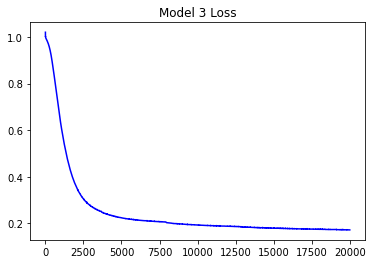

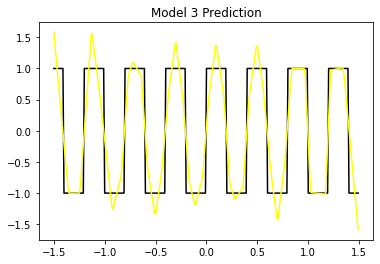

In [305]:
#Plot the loss and prediction for model 3
plt.plot(m3f2_epoch_arr, m3f2_loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,m3f2_prediction.data.numpy(),color="yellow")
plt.title('Model 3 Prediction')
plt.show()

COMPARISON OF LOSSES FOR DIFFERENT MODELS

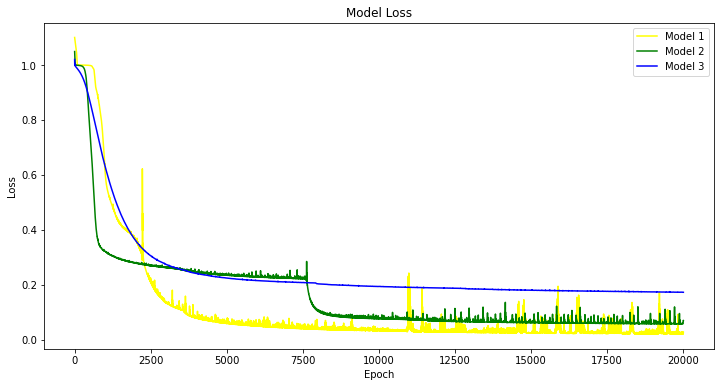

In [314]:
#Plot losses for all models
plt.figure(figsize=(12,6))
plt.plot(m1f2_epoch_arr, m1f2_loss_arr, color = "yellow")
plt.plot(m2f2_epoch_arr, m2f2_loss_arr, color = "green")
plt.plot(m3f2_epoch_arr, m3f2_loss_arr, color = "blue")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

COMPARISON OF PREDICTION FOR DIFFERENT MODELS

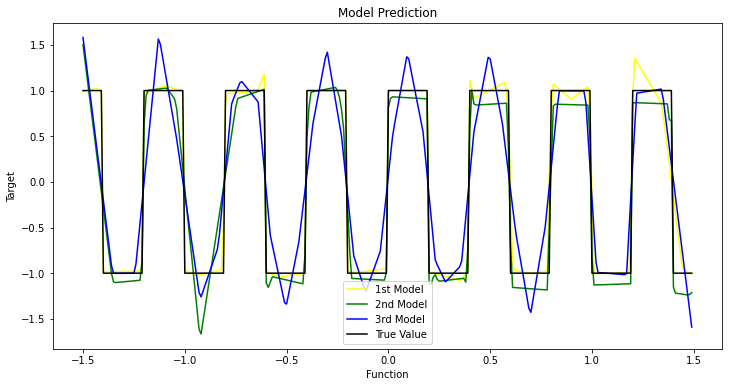

In [313]:
#Plot predictions for all models
plt.figure(figsize=(12,6))
plt.plot(x, m1f2_prediction.data, color="yellow", label = '1st Model')
plt.plot(x, m2f2_prediction.data, color="green", label = '2nd Model')
plt.plot(x, m3f2_prediction.data, color="blue", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()